# Classification Performance Measures（分类性能度量）

## 一、实现混淆矩阵，准确率和召回率

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

# 构造偏斜数据
y[digits.target==9] = 1
y[digits.target!=9] = 0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

D:\Software\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9755555555555555

In [5]:
y_log_predict = log_reg.predict(X_test)

In [6]:
# True Negative
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

TN(y_test, y_log_predict)

403

In [7]:
# False Positive
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

FP(y_test, y_log_predict)

2

In [8]:
# False Negative
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

FN(y_test, y_log_predict)

9

In [9]:
# True Positive
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

TP(y_test, y_log_predict)

36

In [10]:
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)]
    ])

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [11]:
def precision_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    try:
        return tp / (tp + fp)
    except:
        return 0.0

precision_score(y_test, y_log_predict)

0.9473684210526315

In [12]:
def recall_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0.0

recall_score(y_test, y_log_predict)

0.8

### scikit-learn中的混淆矩阵，精准率和召回率

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [14]:
from sklearn.metrics import precision_score

precision_score(y_test, y_log_predict)

0.9473684210526315

In [15]:
from sklearn.metrics import recall_score

recall_score(y_test, y_log_predict)

0.8

### F1 Score

#### F1 Score是precision和recall的调和平均值

In [16]:
def f1_score(precision, recall):
    try:
        return 2 * precision * recall / (precision + recall)
    except:
        return 0.0

In [17]:
precision = 0.5
recall = 0.5
f1_score(precision, recall)

0.5

In [18]:
precision = 0.1
recall = 0.9
f1_score(precision, recall)

0.18000000000000002

In [19]:
precision = 0.0
recall = 1.0
f1_score(precision, recall)

0.0

In [20]:
from sklearn.metrics import f1_score

f1_score(y_test, y_log_predict)

0.8674698795180723

## 二、精准率和召回率的平衡

In [21]:
import matplotlib.pyplot as plt

In [22]:
log_reg.decision_function(X_test)

array([-21.45600241, -32.94974484, -16.40358049, -79.91453954,
       -48.16618205, -24.21675714, -44.76256848, -24.22873941,
        -1.22419553, -19.07705062, -65.86047534, -50.97101681,
       -30.88378196, -46.10873351, -37.39667926, -29.70161737,
       -36.89257707, -82.86825127, -37.76694566,  -9.85938813,
        -9.26258151, -85.27810238, -16.74188106, -45.34375124,
        -4.96737222, -48.46548743, -11.67129106, -37.20040697,
       -25.15906729, -13.49528663, -16.58845322, -28.8663741 ,
       -34.473651  , -28.54898131,  -8.08230001,  -4.60961487,
       -21.65063156, -21.82477575, -30.93142797, -23.48076508,
       -26.95939079, -62.22770727, -37.69983379, -66.33144592,
       -20.08233915, -16.64524478, -18.09489505, -21.62681085,
       -29.05886579, -19.74518847,   2.56637871,   7.73220166,
       -34.78251979, -42.74131467, -25.87245592, -34.88253251,
        -7.61039457, -49.70534246, -51.58301639,  19.69960124,
       -10.13039635, -32.08908631, -11.54702006,  -1.62

In [23]:
log_reg.decision_function(X_test)[:10]

array([-21.45600241, -32.94974484, -16.40358049, -79.91453954,
       -48.16618205, -24.21675714, -44.76256848, -24.22873941,
        -1.22419553, -19.07705062])

In [24]:
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
decision_scores = log_reg.decision_function(X_test)

In [26]:
np.min(decision_scores)

-85.76642438512

In [27]:
np.max(decision_scores)

19.975142566998983

#### 决策边界为5

In [28]:
y_predict_2 = np.array(decision_scores >= 5, dtype='int')

In [29]:
confusion_matrix(y_test, y_predict_2)

array([[404,   1],
       [ 21,  24]], dtype=int64)

In [30]:
precision_score(y_test, y_predict_2)

0.96

In [31]:
recall_score(y_test, y_predict_2)

0.5333333333333333

#### 决策边界为-5

In [32]:
y_predict_3 = np.array(decision_scores >= -5, dtype='int')

In [33]:
confusion_matrix(y_test, y_predict_3)

array([[389,  16],
       [  5,  40]], dtype=int64)

In [34]:
precision_score(y_test, y_predict_3)

0.7142857142857143

In [35]:
recall_score(y_test, y_predict_3)

0.8888888888888888

## 三、分类性能曲线

### PR曲线

In [36]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

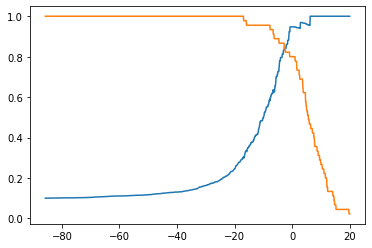

In [37]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

#### Precision-Recall曲线

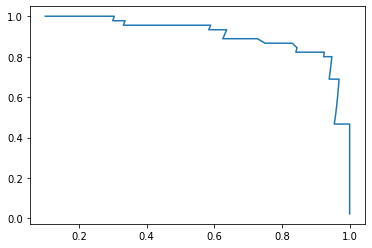

In [38]:
plt.plot(precisions, recalls)
plt.show()

#### scikit-learn中的Precision-Recall曲线

In [39]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [40]:
precisions.shape

(149,)

In [41]:
recalls.shape

(149,)

In [42]:
thresholds.shape

(148,)

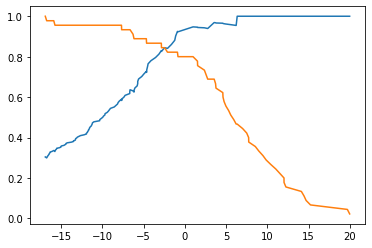

In [43]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

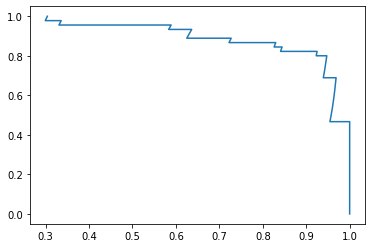

In [44]:
plt.plot(precisions, recalls)
plt.show()

### ROC曲线

#### 描述TPR和FPR的关系

In [45]:
%run D://资料//程序//Python//Machine_Learn/Metrics/metrics.py

In [46]:
fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

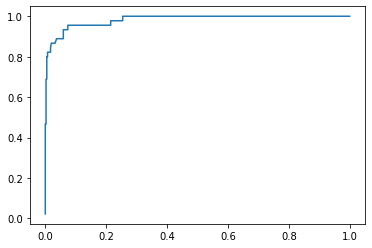

In [47]:
plt.plot(fprs, tprs)
plt.show()

#### scikit-learn中的ROC

In [48]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

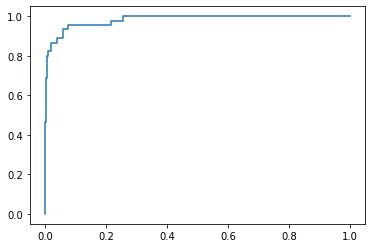

In [49]:
plt.plot(fprs, tprs)
plt.show()

In [50]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)

0.9823868312757201

## 四、多分类问题中的混淆矩阵

In [51]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [53]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

D:\Software\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9711111111111111

In [54]:
y_predict = log_reg.predict(X_test)

In [55]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict, average='micro')

0.9711111111111111

In [56]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict, average='micro')

0.9711111111111111

In [57]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict, average='micro')

0.9711111111111111

In [58]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[46,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 50,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 47,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  0,  0],
       [ 0,  0,  0,  0,  1,  2,  0,  1, 44,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 42]], dtype=int64)

#### 绘制混淆矩阵

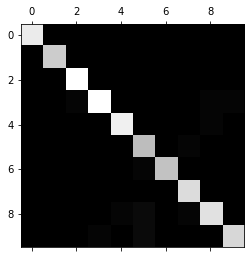

In [59]:
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

In [60]:
row_sums = np.sum(cfm, axis=1)
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0)
err_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.02      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02083333, 0.02222222],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02083333, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02325581, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02631579, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

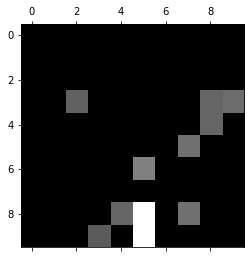

In [61]:
plt.matshow(err_matrix, cmap=plt.cm.gray)
plt.show()